### **Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
# training and test data
df_train = pd.read_csv('../datasets/train.csv')
df_test = pd.read_csv('../datasets/test.csv')

df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
df_test.columns = df_test.columns.str.replace(' ', '_').str.lower()

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               878 non-null    int64  
 1   pid              878 non-null    int64  
 2   ms_subclass      878 non-null    int64  
 3   ms_zoning        878 non-null    object 
 4   lot_frontage     718 non-null    float64
 5   lot_area         878 non-null    int64  
 6   street           878 non-null    object 
 7   alley            58 non-null     object 
 8   lot_shape        878 non-null    object 
 9   land_contour     878 non-null    object 
 10  utilities        878 non-null    object 
 11  lot_config       878 non-null    object 
 12  land_slope       878 non-null    object 
 13  neighborhood     878 non-null    object 
 14  condition_1      878 non-null    object 
 15  condition_2      878 non-null    object 
 16  bldg_type        878 non-null    object 
 17  house_style     

In [5]:
df_train.columns = df_train.columns.str.replace(' ', '_').str.lower()

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [7]:
nulls = df_train[df_train.columns[df_train.isnull().any()]].isnull().sum()
nulls

#https://stackoverflow.com/questions/36226083/how-to-find-which-columns-contain-any-nan-value-in-pandas-dataframe

lot_frontage       330
alley             1911
mas_vnr_type        22
mas_vnr_area        22
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_sf_1         1
bsmtfin_type_2      56
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu      1000
garage_type        113
garage_yr_blt      114
garage_finish      114
garage_cars          1
garage_area          1
garage_qual        114
garage_cond        114
pool_qc           2042
fence             1651
misc_feature      1986
dtype: int64

In [8]:
df_train['bsmtfin_sf_1'].fillna(value = 0, inplace = True)
df_train['bsmtfin_sf_2'].fillna(value = 0, inplace = True)
df_train['bsmt_unf_sf'].fillna(value = 0, inplace = True)
df_train['total_bsmt_sf'].fillna(value = 0, inplace = True)

In [9]:
#numeric_cols = df_train.select_dtypes(include = np.number).columns.tolist()

#numeric_df = df_train.select_dtypes(include = np.number)

In [10]:
numeric_cols = df_train.select_dtypes(include = np.number)
#[i for i in df_train.dtypes.index if df_train.dtypes[i] != 'object']
numeric_df = numeric_cols

In [11]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   lot_frontage     1721 non-null   float64
 4   lot_area         2051 non-null   int64  
 5   overall_qual     2051 non-null   int64  
 6   overall_cond     2051 non-null   int64  
 7   year_built       2051 non-null   int64  
 8   year_remod/add   2051 non-null   int64  
 9   mas_vnr_area     2029 non-null   float64
 10  bsmtfin_sf_1     2051 non-null   float64
 11  bsmtfin_sf_2     2051 non-null   float64
 12  bsmt_unf_sf      2051 non-null   float64
 13  total_bsmt_sf    2051 non-null   float64
 14  1st_flr_sf       2051 non-null   int64  
 15  2nd_flr_sf       2051 non-null   int64  
 16  low_qual_fin_sf  2051 non-null   int64  
 17  gr_liv_area   

In [12]:
numeric_df.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [13]:
numeric_df.fillna(value = 0, inplace = True)

In [58]:
df_train.to_csv('../datasets/clean_df_train.csv')
df_test.to_csv('../datasets/clean_df_test.csv')

<AxesSubplot:>

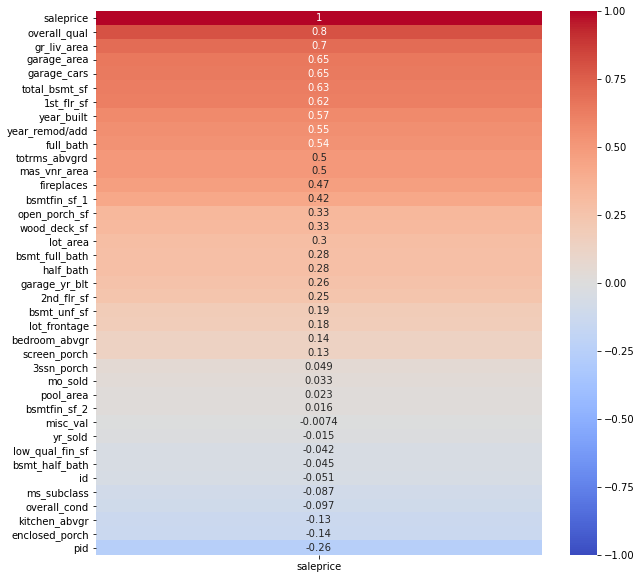

In [15]:
# Heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(numeric_df.corr()[['saleprice']].sort_values('saleprice', ascending = False),
            annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)

In [16]:
# highly correlated: 
# overall_qual, gr_live_area, garage_area, total_bsmt_sf, 
# 1st_flr_sf, year_built, year_remod/add, full_bath

In [17]:
num_corr = ['overall_qual', 'gr_liv_area', 'garage_area', 'total_bsmt_sf', 
            '1st_flr_sf', 'year_built', 'year_remod/add', 'full_bath']

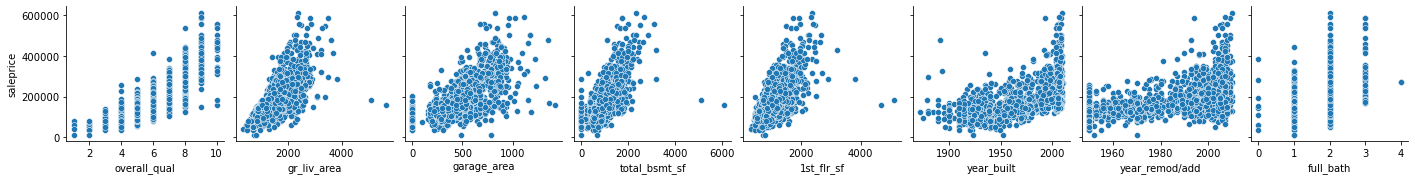

In [18]:
# fig, ax = plt.subplots(4, 2, figsize = (12, 12))
sns.pairplot(numeric_df, y_vars = ['saleprice'], x_vars = num_corr);

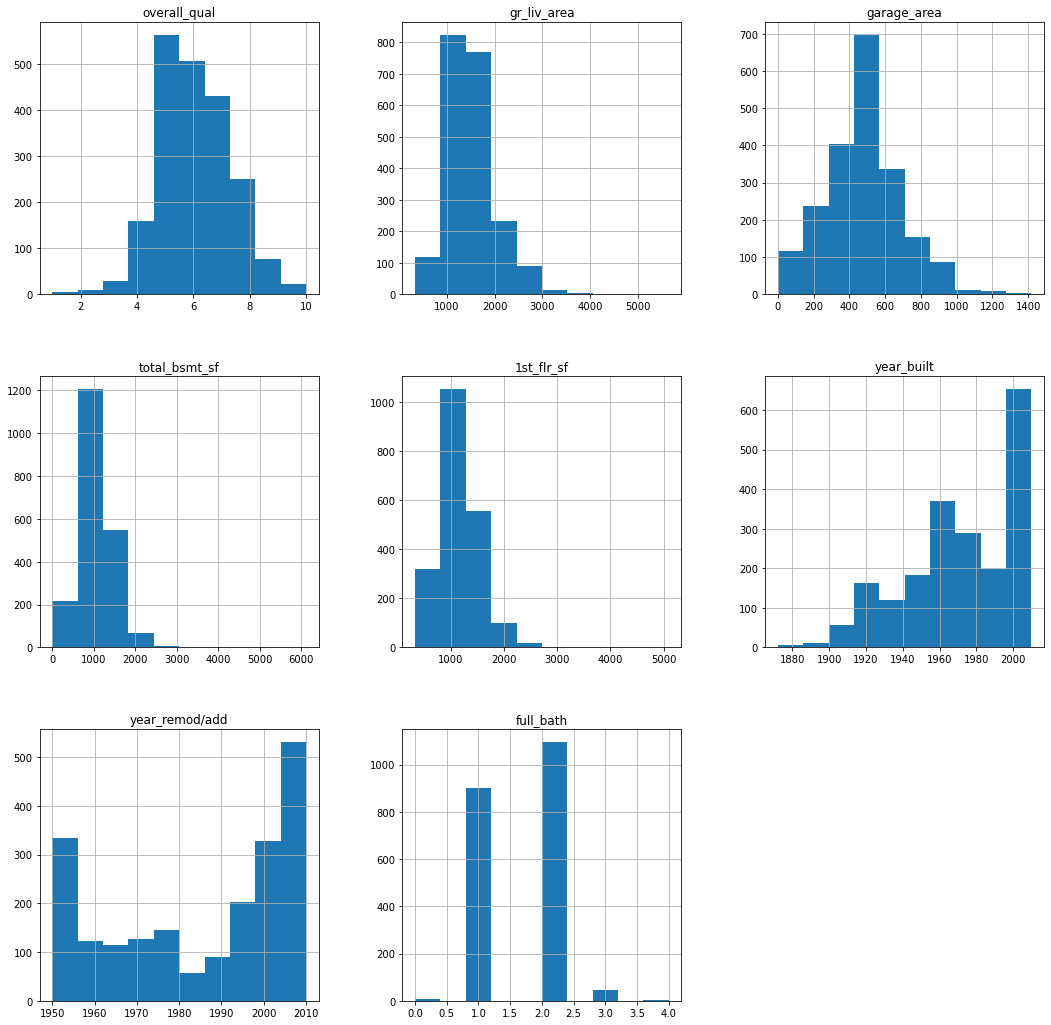

In [19]:
numeric_df[num_corr].hist(figsize = (18, 18));

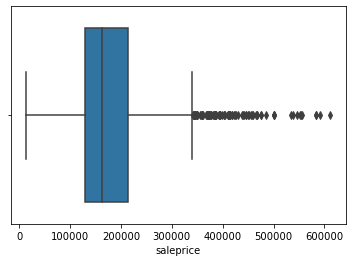

In [20]:
sns.boxplot(x = numeric_df['saleprice']);

In [21]:
numeric_df['saleprice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

In [33]:
#features_lasso = numeric_df.loc[:, numeric_df.columns != 'saleprice']
#X_lasso = features_lasso
#y_lasso = numeric_df['saleprice']

In [34]:
#X_lasso_train, X_lasso_test, y_lasso_train, y_lasso_test = train_test_split(X_lasso, y_lasso)

In [35]:
#ss.fit(X_lasso_train)

In [36]:
#X_train_lasso_sc = ss.transform(X_lasso_train)
#X_test_lasso_sc = ss.transform(X_lasso_test)

In [37]:
#lasso_alpha = np.logspace(0, 5, 200)
#lasso_model = LassoCV(alphas = lasso_alpha)

In [38]:
#lasso_model.fit(X_train_lasso_sc, y_lasso_train)

In [39]:
#lasso_score_train = lasso_model.score(X_train_lasso_sc, y_lasso_train)
#lasso_score_test = lasso_model.score(X_test_lasso_sc, y_lasso_test)

#print(lasso_score_train)
#print(lasso_score_test)

## Visualizing the Lasso

In [ ]:
y.hist()

In [ ]:
residuals = y - predictions
plt.hist(residuals, bins=30);

In [59]:
plt.scatter(predictions, residuals)

NameError: name 'residuals' is not defined